# Two Sample t-Test #

This is also known as the **Independent Samples t-test**

In this notebook we will:

- Go over the mathematics of a 2-sample t-test
- See how to use the `ttest_ind` command in the `scipy.stats` module to run a 2-sample t-test
- Learn how to interpret the results of this hypothesis test.
- Learn how to report the results so as to convey the information to someone not interested in statistics

In [9]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import scipy.stats as stats

from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide/Show Code (Too Advanced or Not the Point)"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def hide_code():
    display(HTML(toggle_code_str))
    

In [10]:
from scipy.stats import ttest_ind as ttest2
from scipy.stats import t
import scipy.stats as stats
import scipy.stats

def groupstats(table, group, data):
    ### This function will find all the major descriptive stats you need ###
    cut = table.select(group, data).sort(group)
    favstats = cut.group(group, np.mean).sort(group)
    words = [data, 'mean']
    favstats = favstats.relabeled(' '.join(words), "mean")
    groups = favstats.column(0)
    q1=make_array()
    for i in np.arange(len(groups)):
        q1 = np.append(q1, np.percentile(table.where(group, groups.item(i)).column(data), 25))
    q3=make_array()
    for i in np.arange(len(groups)):
        q3 = np.append(q3, np.percentile(table.where(group, groups.item(i)).column(data), 75))
    favstats = favstats.with_column('std', cut.group(group, stats.tstd).sort(group).column(1) )
    favstats = favstats.with_column('min', cut.group(group, min).sort(group).column(1) )
    favstats = favstats.with_column('Q1', q1 )
    favstats = favstats.with_column('median', cut.group(group, np.median).sort(group).column(1) )
    favstats = favstats.with_column('Q3', q3 )
    favstats = favstats.with_column('max', cut.group(group, max).sort(group).column(1) )
    favstats = favstats.with_column('IQR', cut.group(group, stats.iqr).sort(group).column(1) )
    favstats = favstats.with_column('n', cut.group(group ).sort(group).column(1) )
    return favstats


from hide_code3 import hide_code

hide_code()

# Comparing Two Samples

For this test, the samples must be independent.  

In [11]:
births = Table.read_table('baby.csv')

In [12]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [13]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [14]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


In [15]:
groupstats(smoking_and_birthweight, "Maternal Smoker", "Birth Weight")

Maternal Smoker,mean,std,min,Q1,median,Q3,max,IQR,n
False,123.085,17.4237,55,113,123,134,176,21,715
True,113.819,18.295,58,101,115,126,163,25,459


# Preparing the Data

First, we have to put the two groups in separate arrays.  This is necessary to make the side-by-side boxplots that are the traditional way of examining differences between two groups when running tests like the 2-sample t-test.  However, doing this will also make running the test easier in the next step.  

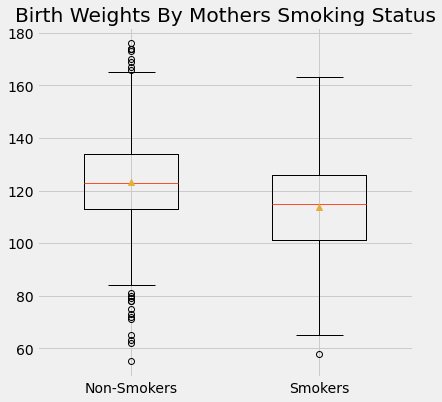

In [16]:
# To make side-by-side boxplots for two groups, 
# copy this cell and only change the next four lines

group1 = smoking_and_birthweight.where('Maternal Smoker', False).column(1)  # Change to data for first group
group2 = smoking_and_birthweight.where('Maternal Smoker', True).column(1) # Change to data for second group
labels = make_array("Non-Smokers", "Smokers")  # Change to appropriate labels
my_title = "Birth Weights By Mothers Smoking Status"  # Change to your title

## Make no changes below here but do copy

ticks=make_array(2.5, 3.5)  
plots.figure(figsize=(6, 6))
plots.boxplot(group1, widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(group2, widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.xticks(ticks, labels)
plots.title(my_title); 


# 2-Sample t-Test

Since we went throught the effort of naming the two groups to make the boxplots, we can use those names again to make the running the t-test easier.  Notice that we imported `scipy.stats.ttest_ind` as simply `ttest2`, we use this shorter command in the cell below.  

In [17]:
ttest2(group1, group2, equal_var=False)

Ttest_indResult(statistic=8.626464445756927, pvalue=2.6564639952299482e-17)

The p-value shown here is extremely small.  Therefore, we conclude that there is a significant difference in weights for babies based on whether their mothers smoked.  From the boxplots, we can tell that the Non-Smoker mothers had babies with higher birth weights.  

In [18]:
ttest2(group1, group2)

Ttest_indResult(statistic=8.718755502379533, pvalue=9.461067881089321e-18)

In [19]:
np.mean(group1)-np.mean(group2)

9.266142572024918

## Reporting out ##

When reporting this to a client or supervisor, you may write something like this:

### The difference in average birthweights of babies between mothers that smoke and those that do not is about 9.3 oz, with Non-Smokers having the greater average birthweight.  See Table and Figure 1 below.  This difference was statistically significant (t = 8.63, p <0.001). ###

<table>
    <tr>
        <th> Group </th>
        <th> Mean </th>
        <th> St. Dev </th>
    </tr>
    <tr>
        <td> Smokers</td>
        <td> 113.8 </td>
        <td> 18.3 </td>
    </tr>
    <tr>
        <td> Non-Smokers</td>
        <td> 123.1 </td>
        <td> 17.4 </td>
    </tr>
    
</table>


Also, in many situations, you would include the side-by-side boxplot we generated above.


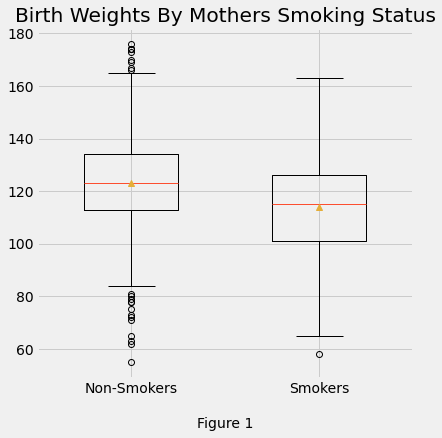

In [20]:
# To make side-by-side boxplots for two groups, 
# copy this cell and only change the next four lines

group1 = smoking_and_birthweight.where('Maternal Smoker', False).column(1)  # Change to data for first group
group2 = smoking_and_birthweight.where('Maternal Smoker', True).column(1) # Change to data for second group
labels = make_array("Non-Smokers", "Smokers")  # Change to appropriate labels
my_title = "Birth Weights By Mothers Smoking Status"  # Change to your title

## Make no changes below here but do copy

ticks=make_array(2.5, 3.5)  
plots.figure(figsize=(6, 6))
plots.boxplot(group1, widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(group2, widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.xticks(ticks, labels)
plots.title(my_title)
plots.text(3, 30,"Figure 1", ha='center'); 

hide_code()

# What is this test doing?

Full disclosure:  No one will ever ask you to do this in this way.  People just to remember how to run the ttest2 command and how to interpret the results.  The second part is why we're looking at this part; knowing what the test is doing and how the values are calculated make it easier to appropriately interpret the results.  

## Step 1: Determine the hypotheses

The null hypothesis for a 2-sample t-test is typically:

$H_o: \mu_1 = \mu_2$

While the alternative or research hypothesis is one of the following three options:

$H_a: \mu_1 \not= \mu_2$

$H_a: \mu_1 > \mu_2$

$H_a: \mu_1 < \mu_2$




## Step 2: Find the Test Statistic

The test statistic for a 2-sample t-test (assuming unequal variances) is:

$$  t = \frac{ \overline{x}_1 -\overline{x}_2}{\sqrt{\frac{S_1^2}{n_1} +\frac{S_2^2}{n_2}}}$$


## Step 3: Find the degrees of freedom

What are the degrees of freedom?  To explain that, we need to look at some graphs.

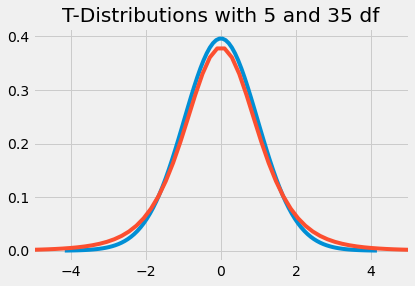

In [21]:
rv = t(df=35, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-5,5)
plots.plot(x,y);


rv = t(df=5, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-5,5)
plots.plot(x,y)
plots.title("T-Distributions with 5 and 35 df");

In [22]:
import IPython
#url = "https://public.flourish.studio/visualisation/1631776/"
#url = "C:/Users/bbailey/Desktop/Jupyter Lectures/Tdist.gif"
url = "Tdist.gif"
iframe = '<iframe src=' + url + ' width=530 height=450></iframe>'
IPython.display.HTML(iframe)

C:\Users\Abra\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# T-distribution graphs

There isn't just one t-distribution.  There is a different t-distribution for every value of the degrees of freedom; that is to say that the degrees of freedom change the shape of the graph.  The graph above just illustrates two possible t-distribution graphs.  


## Do NOT memorize this formula; not important

$$ df = \frac{\left[ \frac{S_1^2}{n_1}+ \frac{S_2^2}{n_2} \right]^2}{\frac{\left(\frac{S_1^2}{n_1}\right)^2 }{n_1-1} + \frac{\left(\frac{S_2^2}{n_2}\right)^2 }{n_2-1}  }$$

## Step 4: Find the p-value

The p-value is computed by looking at the area under the appropriate t-distribution.  

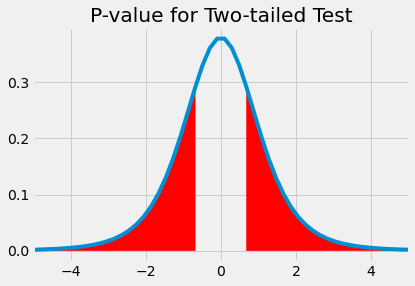

In [23]:
rv = t(df=5, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-5,5)
plots.plot(x,y)
plots.fill_between(x, y, where = abs(x) > 0.5, color="r")
plots.title("P-value for Two-tailed Test");


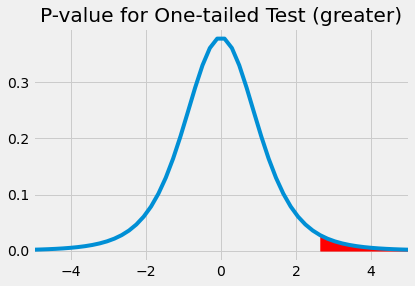

In [24]:
rv = t(df=5, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-5,5)
plots.plot(x,y)
plots.fill_between(x, y, where = (x) > 2.5, color="r")
plots.title("P-value for One-tailed Test (greater)");

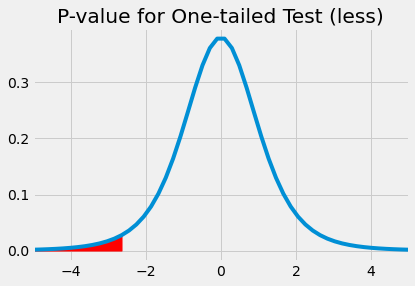

In [25]:
plots.xlim(-5,5)
plots.plot(x,y)
plots.fill_between(x, y, where = (x) < -2.5, color="r")
plots.title("P-value for One-tailed Test (less)");

## Recall the hypotheses

The null hypothesis:

$H_o: \mu_1 = \mu_2$

While the alternative or research hypothesis is **one** of the following three options:

$H_a: \mu_1 \not= \mu_2$

$H_a: \mu_1 > \mu_2$

$H_a: \mu_1 < \mu_2$


## Final Step: Interpretting p-value in Context

If your p-value is _small_, typically less than 0.05, then you reject the null hypothesis, and instead believe the alternative hypothesis.

If your p-value is _large_, we do not reject the null hypothesis.  That is not the same as saying we accept or believe the null hypothesis; what it means is that we don't have evidence enough to reject it.

In [26]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [27]:
std_table = smoking_and_birthweight.group('Maternal Smoker', np.std)
std_table

Maternal Smoker,Birth Weight std
False,17.4115
True,18.2751


In [28]:
size_table = smoking_and_birthweight.group('Maternal Smoker')
size_table

Maternal Smoker,count
False,715
True,459


In [29]:
diff_in_means = means_table.column(1).item(0) - means_table.column(1).item(1)
st_error = np.sqrt(std_table.column(1).item(0)**2/size_table.column(1).item(0) + std_table.column(1).item(1)**2/size_table.column(1).item(1))

t_stat = diff_in_means/st_error

t_stat

8.634634929032464

In [30]:
#df = (std_table.column(1).item(0)**2/size_table.column(1).item(0) + std_table.column(1).item(1)**2/size_table.column(1).item(1))**2/((std_table.column(1).item(0)**4/size_table.column(1).item(0)**2/(size_table.column(1).item(0)-1) + std_table.column(1).item(1)**4/size_table.column(1).item(1)**2/(size_table.column(1).item(1)-1)))

df_top = (std_table.column(1).item(0)**2/size_table.column(1).item(0) + std_table.column(1).item(1)**2/size_table.column(1).item(1))**2

df_bottom = ((std_table.column(1).item(0)**4/size_table.column(1).item(0)**2/(size_table.column(1).item(0)-1) + std_table.column(1).item(1)**4/size_table.column(1).item(1)**2/(size_table.column(1).item(1)-1)))

df = df_top/df_bottom

df

942.0912087904698

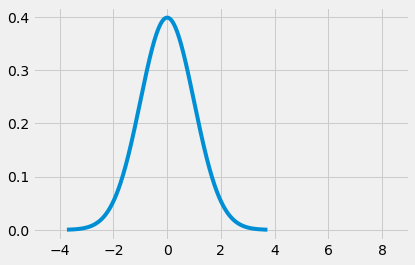

In [31]:
rv = t(df=df, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)
y = rv.pdf(x) 

plots.xlim(-5,9)
plots.plot(x,y)
plots.fill_between(x, y, where = x > t_stat, color="r");

In [32]:
1-t.cdf(t_stat, df)

0.0

# Random Permutation (Shuffling)

In [33]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [34]:
letters.sample()

Letter
a
d
b
d
b


In [35]:
letters.sample(with_replacement = False)

Letter
c
b
d
a
e


In [36]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

Letter,Shuffled
a,b
b,c
c,d
d,a
e,e


# Simulation Under Null Hypothesis

In [37]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [38]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

In [39]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [40]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')

shuffled_labels

array([ True,  True, False, ...,  True,  True, False])

In [41]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [42]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,True
False,113,True
True,128,False
True,108,False
False,136,True
False,138,False
False,132,False
False,120,True
True,143,True
False,140,False


In [43]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

1.9556926733397262

In [44]:
observed_difference = difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')
observed_difference

-9.266142572024918

# Permutation Test

In [45]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [46]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

1.2330880448527495

In [47]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -9.266142572024918


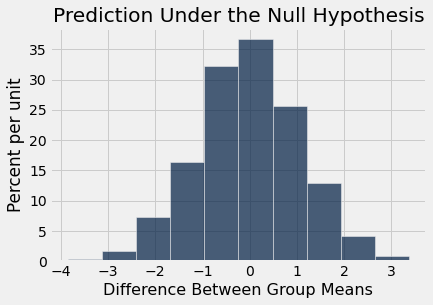

In [48]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

In [49]:
pvalue = sum(differences <= -9.2661 )/2500
pvalue

0.0

In [50]:
NonSmokers = births.where('Maternal Smoker', False).select("Gestational Days", "Birth Weight")
Smokers = births.where('Maternal Smoker', True ).select("Gestational Days", "Birth Weight")

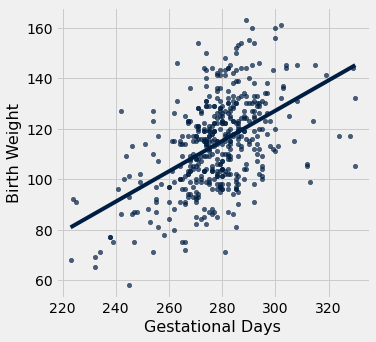

In [51]:
Smokers.scatter("Gestational Days", fit_line=True)

In [52]:
groupstats(births, 'Maternal Smoker', 'Gestational Days')

Maternal Smoker,mean,std,min,Q1,median,Q3,max,IQR,n
False,279.874,16.4728,148,273,281,289,353,16,715
True,277.898,15.2014,223,271,278,286,330,15,459


In [53]:
smokers_days = births.where("Maternal Smoker", True).column("Gestational Days") 

nonsmokers_days = births.where("Maternal Smoker", False).column("Gestational Days") 

ttest2(nonsmokers_days, smokers_days, equal_var=False)

Ttest_indResult(statistic=2.1034386984694016, pvalue=0.03566890676328473)

### Reporting Out ###

#### The mean number of gestational days for smokers is 277.9 while for non-smokers it is 279.9, a difference of 2 days on average;  see the Table and Figure 1 below.  This difference is statistically significant (t = 2.103, p = 0.036).  ####


<table>
    <tr>
        <th> Group </th>
        <th> Mean Days </th>
        <th> St. Dev </th>
    </tr>
    <tr>
        <td> Smokers</td>
        <td> 277.9 </td>
        <td> 15.2 </td>
    </tr>
    <tr>
        <td> Non-Smokers</td>
        <td> 279.9 </td>
        <td> 16.5 </td>
    </tr>
    
</table>



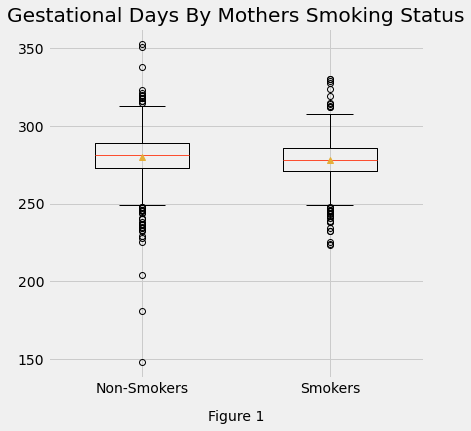

In [54]:
# To make side-by-side boxplots for two groups, 
# copy this cell and only change the next four lines

group1 = births.where('Maternal Smoker', False).column("Gestational Days")  # Change to data for first group
group2 = births.where('Maternal Smoker', True).column("Gestational Days") # Change to data for second group
labels = make_array("Non-Smokers", "Smokers")  # Change to appropriate labels
my_title = "Gestational Days By Mothers Smoking Status"  # Change to your title

## Make no changes below here but do copy

ticks=make_array(2.5, 3.5)  
plots.figure(figsize=(6, 6))
plots.boxplot(group1, widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(group2, widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.xticks(ticks, labels)
plots.title(my_title)
plots.text(3, 110,"Figure 1", ha='center'); 

hide_code()

In [ ]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Gestational Days', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

In [ ]:
observed_difference = np.average(smokers_days) - np.average(nonsmokers_days)

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist('Difference Between Group Means', right_end = -1.97)
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

In [ ]:
pvalue = 2*sum(differences <= observed_difference)/2500
pvalue

## Assumptions of t-test ##

- First, the data must be true numeric data (not just categorical variable that have been relabelled with numbers)
- Approximately normal data in each group (take a look at the histograms)
- Approximately equal variance in both groups (the if half the larger standard deviation is still more than the smaller, then this assumption is violated).

If the sample size (sizes) are large, these issues are not usually a problem.